# Weekly Meeting 6

This week:
    
* To study the confusions of the systems that consider symbolic information.
* To propose a neural encoder for learning graph embeddings.

importing Jupyter notebook from WeeklyMeeting2.ipynb


**** Generative ****


Example 1/11: 

Entities (org): Guidant Corp., Johnson & Johnson Inc.

Context:
Guidant Corporation, part of Boston Scientific and Abbott Labs, designs and manufactures artificial cardiac pacemakers, implantable cardioverter-defibrillators, stents, and other cardiovascular medical products. Their company headquarters is located in Indianapolis, Indiana. Their main competitors are Medtronic, St. Jude Medical, and Johnson and Johnson. Johnson & Johnson is an American multinational corporation founded in 1886 that develops medical devices, pharmaceutical and consumer packaged goods. Its common stock is a component of the Dow Jones Industrial Average and the company is ranked No. 37 on the 2018 Fortune 500 list of the largest United States corporations by total revenue. J&J is one of the world's most valuable companies. Boston Scientific, With Abbott's Help, Raises Bid for Guidant: Boston Scientific, with financi

<IPython.core.display.Javascript object>


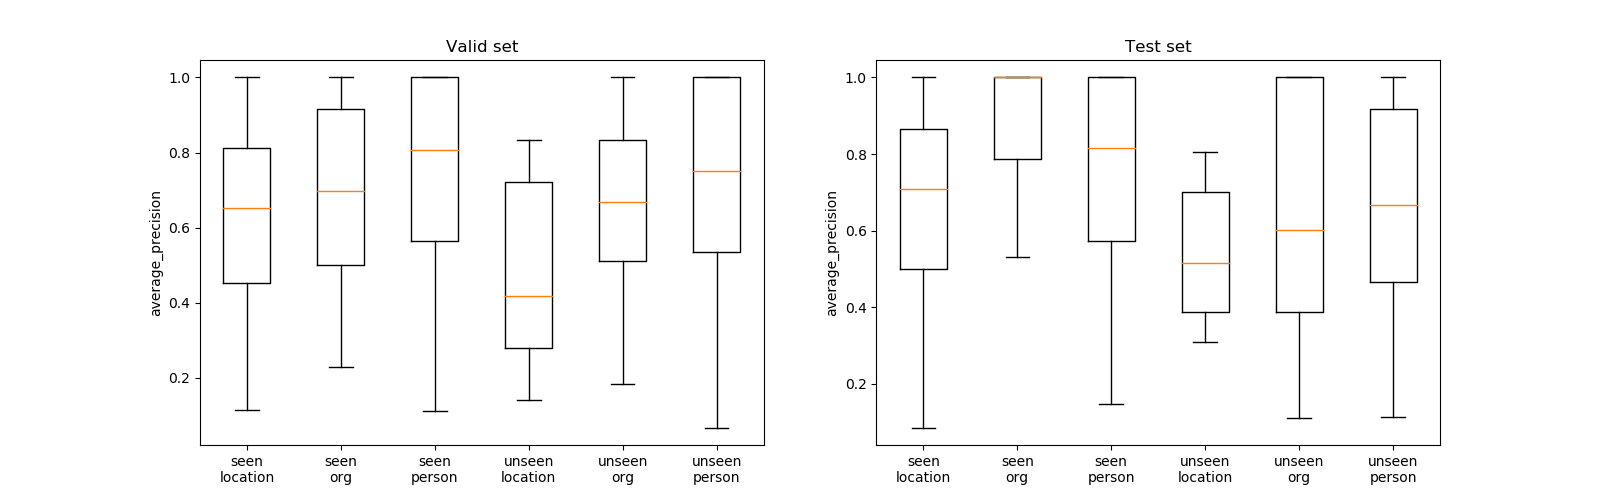

<IPython.core.display.Javascript object>


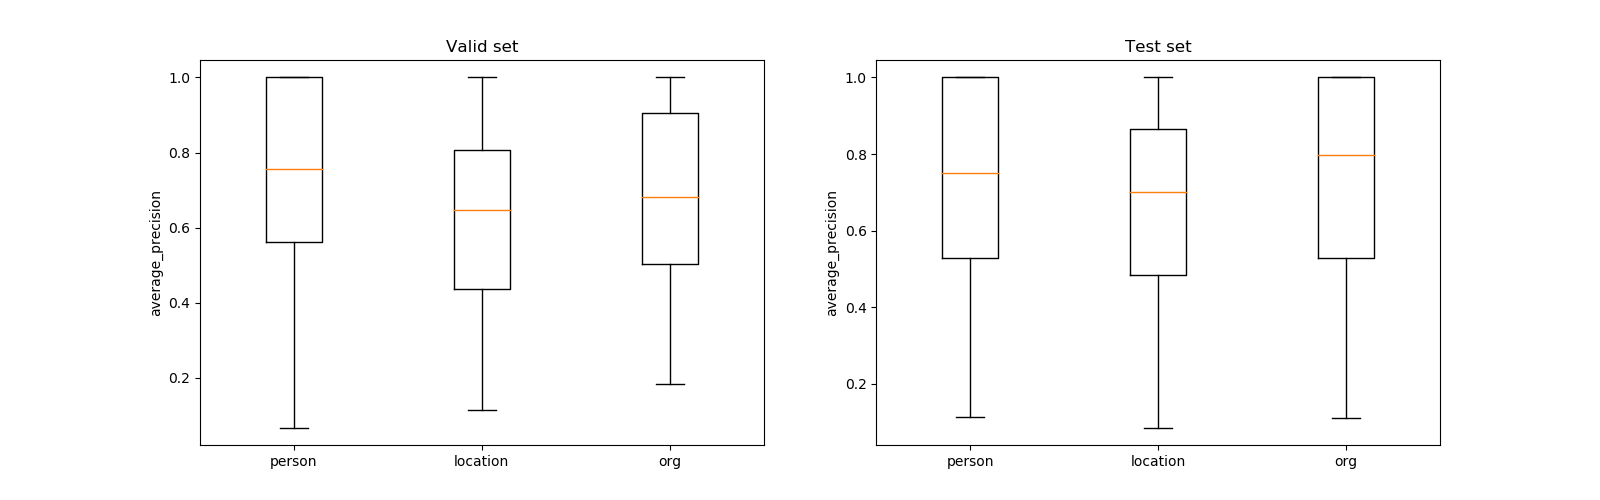

Discriminative


<IPython.core.display.Javascript object>


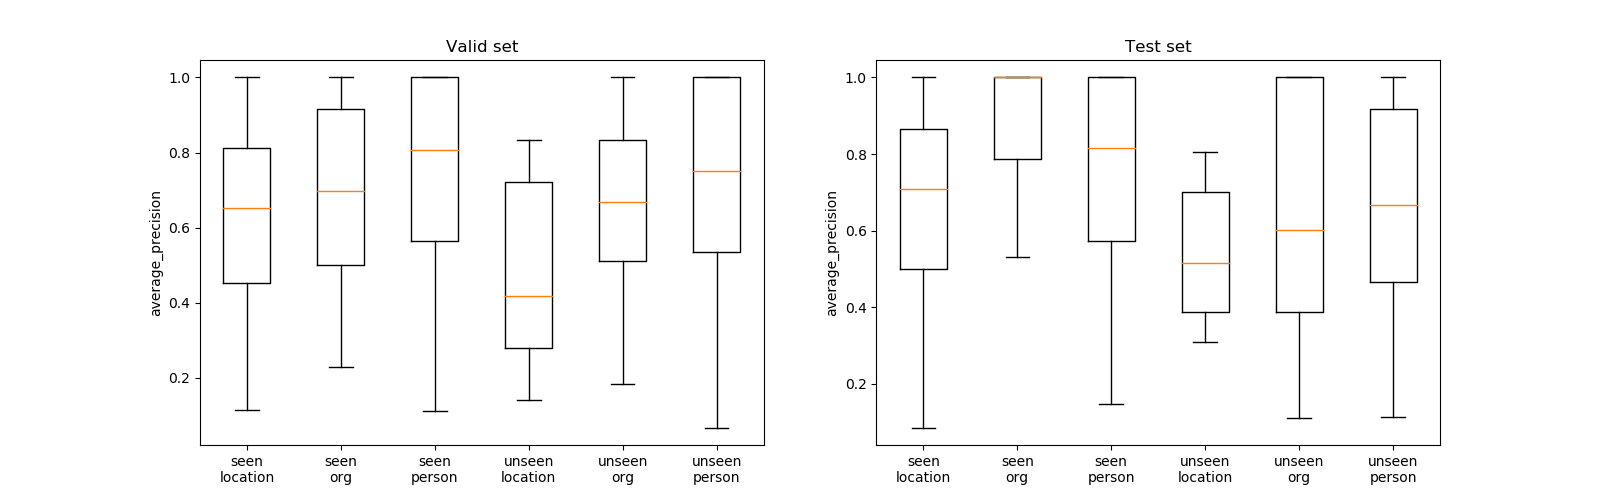

<IPython.core.display.Javascript object>


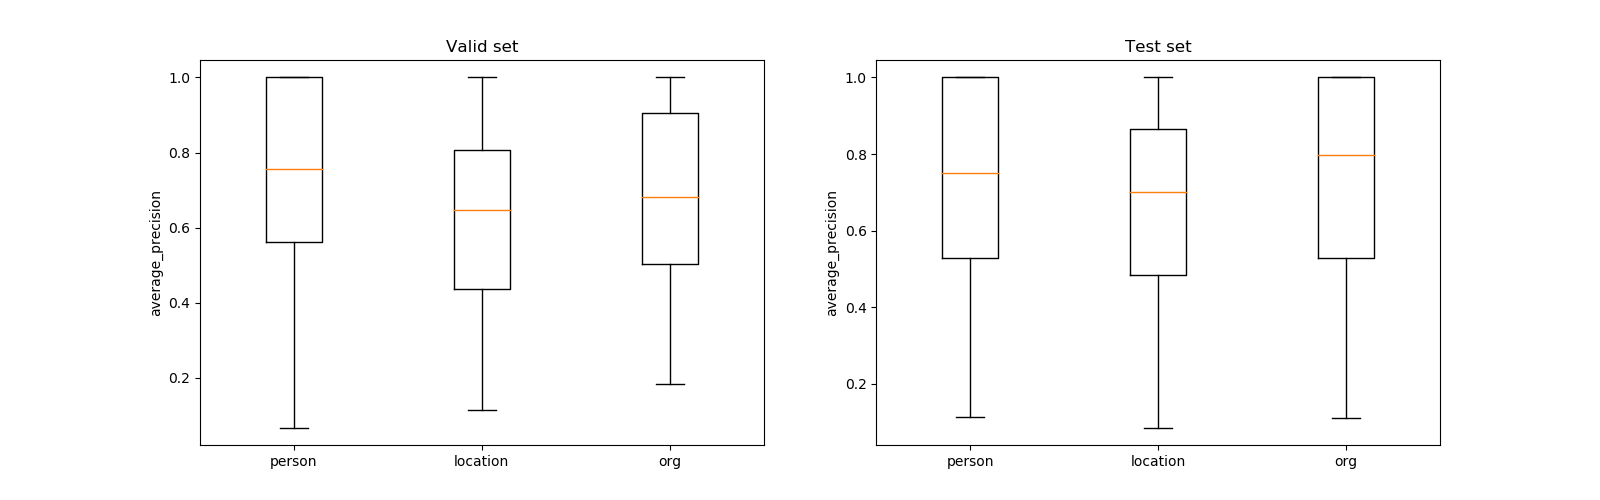

Discriminative


<IPython.core.display.Javascript object>


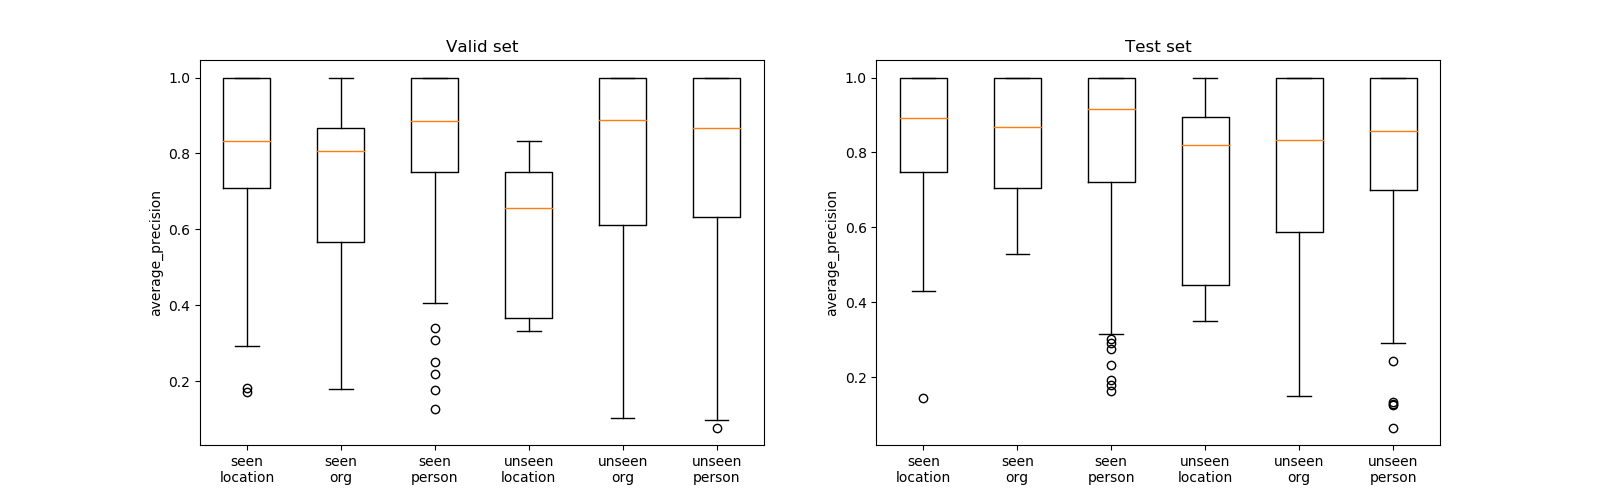

<IPython.core.display.Javascript object>


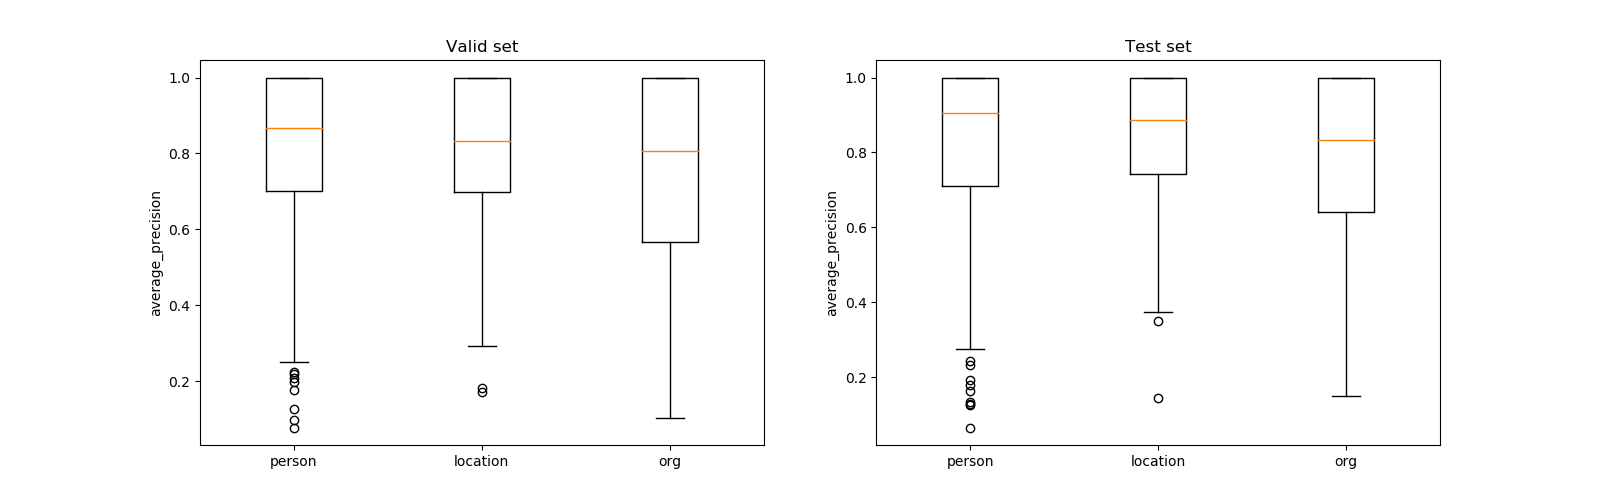

Generative


<IPython.core.display.Javascript object>


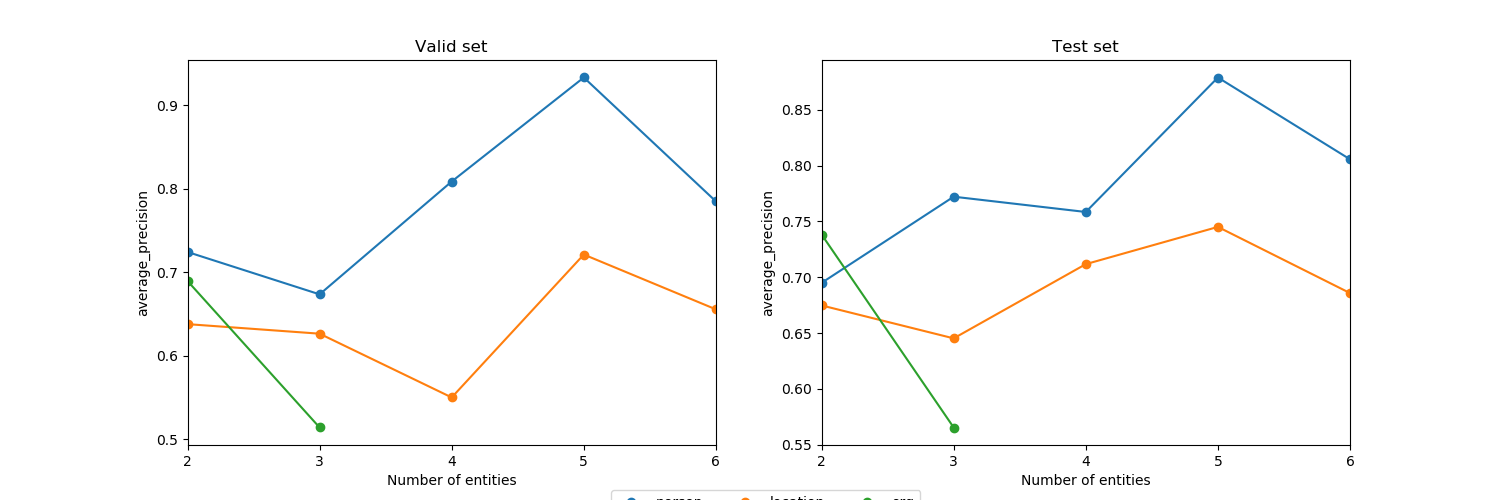

Discriminative


<IPython.core.display.Javascript object>


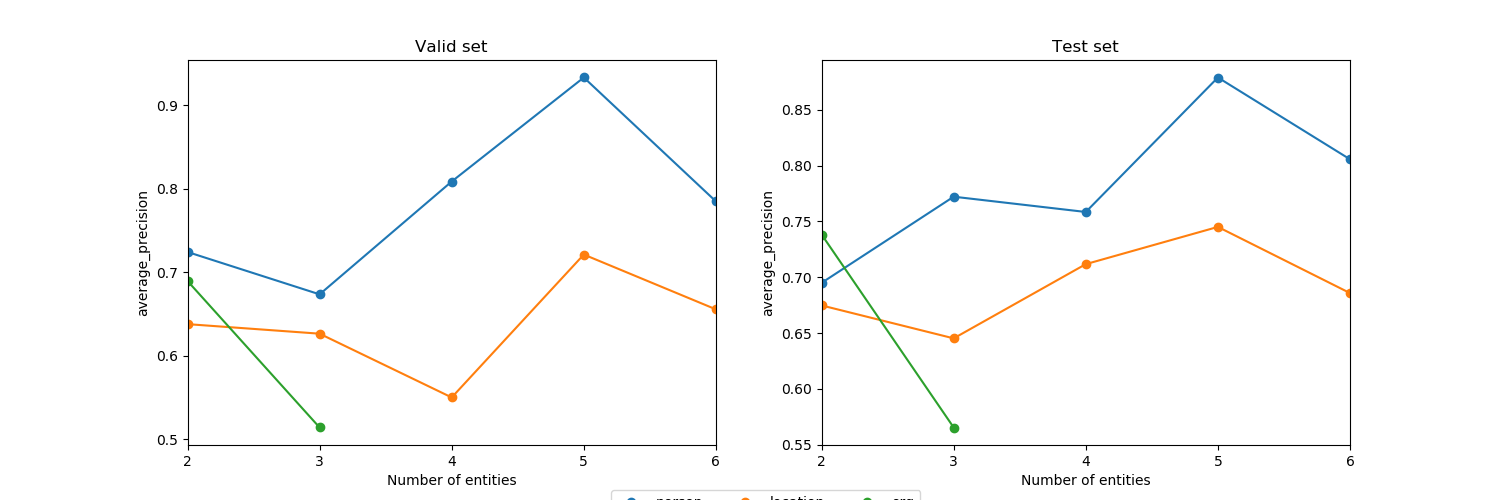

Generative


<IPython.core.display.Javascript object>


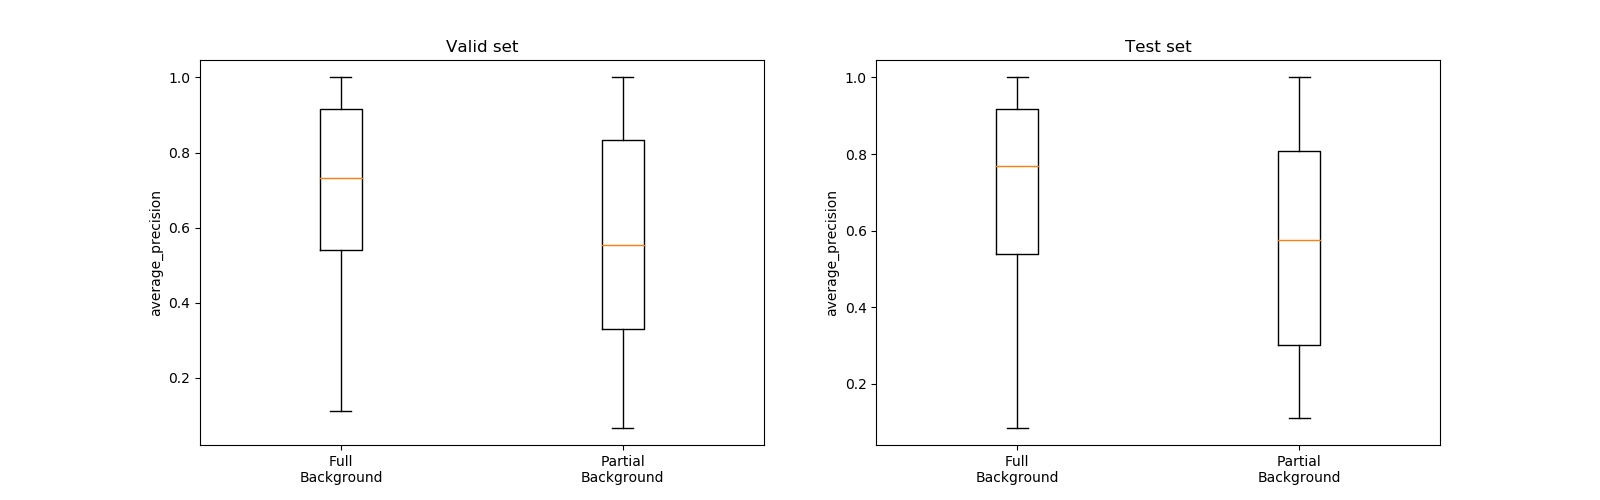

Discriminative


<IPython.core.display.Javascript object>


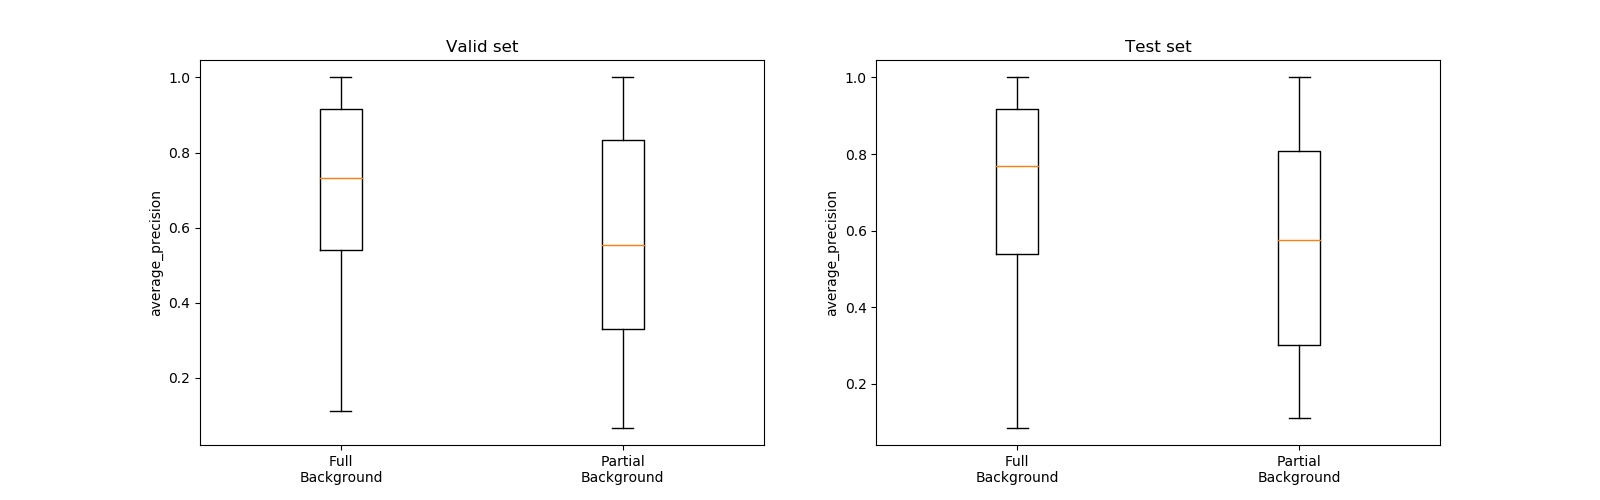

                 Agg                  Gen                 Disc               NRanks
             nations                   85                    1                   40
    political powers                   76                    2                   41
              states                   41                    0                    7
           countries                   40                    2                   44
        world powers                   37                    3                   11
             regions                   21                    0                    5
              allies                   18                    0                    1
     world locations                   18                    1                    2
       global powers                   22                    5                    2
 important countries                   19                    6                    1
       world leaders                   14                    2              

*) "iraqi cities" confused by other 0 choices (appears in 1 rankings)
*) "cities in iraq" confused by other 0 choices (appears in 1 rankings)
*) "southern regions" confused by other 0 choices (appears in 1 rankings)
*) "american places" confused by other 0 choices (appears in 2 rankings)
*) "eastern european regions" confused by other 0 choices (appears in 1 rankings)
*) "european areas" confused by other 0 choices (appears in 1 rankings)
*) "world countries" confused by other 0 choices (appears in 1 rankings)
*) "eastern states" confused by other 0 choices (appears in 1 rankings)
*) "northeastern states" confused by other 0 choices (appears in 1 rankings)
*) "european regions" confused by other 0 choices (appears in 2 rankings)
*) "east asian country" confused by other 0 choices (appears in 1 rankings)
*) "north american countries" confused by other 0 choices (appears in 1 rankings)
*) "eastern areas" confused by other 0 choices (appears in 1 rankings)
*) "locations" confused by other

In [1]:
import pickle as pkl
import import_ipynb
from WeeklyMeeting2 import *

# Study of the confusions

## Symbolic information

As symbolic information I used the $k$-lowest common ancestors. From the previous meeting:

> "... The lowest common ancestors lose some useful information: ..."
> <br> "... The $k$ parameter makes difficult to select good ancestors. If $k$ is small some useful information is missing. If $k$ is big, noisy information is frequent: ..." <br> 

I considered $k=6$-lowest common ancestors because, visually, on the examples of the previous meeting, it obtained a reasonable amount of useful information without including much noise.


## Format of the aggregatable instances

Given an aggregatable instance where $B=\{B_1, ..., B_i\}$ is the set of entity backgrounds, $C$ is the context (title + nyt article), $E=\{E_1, ..., E_i\}$, is the set of entities, $A=\{A_1, ..., A_k\}$ is the set of the $k$-lowest common ancestors and $G=\{G_1, ..., G_j\}$ is the set of gold aggregations, I trained a BART model with the ablations of all the information except of the ancestors:

* **BCE**: $[B, C, E] \rightarrow G_i\ |\ [B, C, E]$
* **ABCE**: $[A, B, C, E] \rightarrow G_i\ |\ [A, B, C, E]$
* **ACE**: $[A, C, E] \rightarrow G_i\ |\ [A, C, E]$
* **AE**: $[A, E] \rightarrow G_i\ |\ [A, E]$

## Missing ancestors
In the same way that there are missing backgrounds, also there is missing symbolic information (ancestors) because: an entity of a tuple has not got categories or an entity of a tuple does not exist in Wikipedia.

| Subset | Tuples w/ ancestors | Tuples w/o ancestors | 
| --- | --- | --- |
|Train | 707 (82.40%) | 151 (16.60%) | 
|Valid | 366 (85.12%) | 64 (14.88%) |
|Test | 366 (85.12%) | 64 (14.88%) |


## Results

**MCL**: Max context length
<br>**ACL**: Average context length
<br>$\dagger$: systems trained on target_format=v0 
Reviewed: max_tokens=2048 is not the max_tokens of the generative system Clement used. I redid the experimentation with max_tokens=1024, the results improve -> This is in the WeeklyMeeting7

| System | MAP | R@10 | MRR | MLC (w) | ALC (w) |
| -- |  -- | -- | -- | -- | -- |
| BCE$\dagger$ | 70.11 | 91.37 | 83.81 | 684 | 220.68 |
| BCE | 82.52 | 92.52 | 94.15 | 684 | 220.68 |
| ABCE | **82.76** | **93.73** | **94.36** | 699 | 237.94 |
| ACE| 79.93 | 91.76 | 92.14 | 305 | 100.05 |
| AE| 73.94 | 87.67 | 87.28  | 50 | 21.72 |

<br>In no case the words of the context are removed due to the maximum length constrain (max_len=750 and max_tokens=2048).

## Confusions

The aggregations most confused by the systems (w/ and w/o including ancestors) are very similar ([Confusions BCE](#confusions_bce), [Confusions ABCE](#confusions_abce), [Confusions ACE](#confusions_ace), [Confusions AE](#confusions_ae))

Jaccard index for all pairs of systems' confusions on the *person* type:

| Symb | BCE | ABCE | ACE | AE |
| --- | --- | --- | --- | --- |
| BCE | 1 | 89.05 | 73.79 | 67.80
| ABCE |  | 1 | 76.00 | 69.62
| ACE |  |  | 1 | 75.19
| AE |  |  |  | 1


Analysis of the confusions to try to answer two questions: 

* What confusions are solved by adding the symbolic information? (BCE vs [ABCE, ACE, AE])
* What confusions appear by adding the symbolic information?  ([ABCE, ACE, AE] vs BCE)


### What confusions are solved by adding the symbolic information?

To do this analysis, I searched for gold aggregations that are less confused by all the A.\* systems than by the BCE system.

<br>

Some examples:

---

<br> 1) *belarusian politicians*: 10 (*BCE*) > 6 (*ABCE*) > 1 (*ACE*) > 0 (*AE*)  *In the ancestors*: Belarusian politicians, Belarusian people, ...

<br> 2) *contributors to the play*: 6 (*BCE*), 3 (*ABCE*, *AE*), 0 (*ACE*) *In the ancestors*: American film actors, American stage actors, American television actors, ... 

<br> 3) *islamic powers*: 17 (*BCE*) > 6 (*AE*) > 5 (*ABCE*, *ACE*) *In the ancestors*: Member states of the Organisation of Islamic Cooperation, Countries in Asia, Near Eastern countries, ...

<br> 4) *israeli territories*: 21 (*BCE*) > 8 (*ACE*, *AE*) > 5 (*ABCE*) *In the ancestors*: Geography of Western Asia, Eastern Mediterranean, Geography of the Middle East, Regions of Asia, ...

<br> 5) *transportation organizations*: 5 (*BCE*) > 3 (*AE*) > 0 (*ABCE*, *ACE*) *In the ancestors*: Transportation organizations based in the United States, Transport organizations, ...

<br> 6) *bush family members*: 8 (*BCE*) > 5 (*ABCE*, *ACE*) > 3 (*AE*) *In the ancestors*: First Families of the United States,  Political families of the United States, ...

<br> 7) *russian expatriates*: 4 (*BCE*) > 3 (*AE*) > 0 (*ABCE*, *ACE*) *In the ancestors* Russian emigrants to the United Kingdom, Russian expatriates, Russian people, Russian activists, Russian emigrants,

<br> 8) *sport's comissioners*: 16 (*BCE*) > 14 (*ABCE*) > 13 (*AE*) > 9 (*ACE*) *In the ancestors*: Sports commissioners, ...

<br> 9) *silicon valley organizations*: 11 (*BCE*) > 9 (*ABCE*, *ACE*) > 8 (*AE*) *In the ancestors*: Companies based in California, Companies based in the San Francisco Bay Area

<br> 10) *theater participants*: 14 (*BCE*, *ABCE*) > 11 (*AE*) > 10 (*ACE*) *In the ancestors*: Broadway theatre people, Theatre people, ...

---

There is useful information in the ancestors for all the better ranked aggregations shown in the previous examples. So, to use the ancestors in some way (*ABCE*, *ACE* or *AE*) seems to reduce the confusions for aggregations of entities whose ancestors contain useful information about the aggregation (I have not found any pattern for the aggregations that are now less confused). 

But, in some of these cases, the aggregations remain highly confused by at least one of the models that consider the ancestors (8, 9, 10).


For ABCE, most of the previous examples have background, so, the ancestors are enriching the information of the background (3, 4, 7, 8, 9, 10). Also, there are some cases where the backgrounds of some/all entities are missing and the ancestors seem useful (1, 2, 5, 6).


Although in terms of the global scores, ABCE is better, ACE and AE work better or equal than ABCE in most cases (1, 2, 3, 5, 6, 7, 8, 9, 10). 


### What confusions appear by adding the symbolic information?

The symbolic information seems to reduce the confusions in some cases, but in other cases some aggregations are more confused than by the BCE system. To do this analysis, I searched for gold aggregations that are more confused by the A.\* systems than by the BCE system (inversely to the previous section). Some examples:

---

<br> 1) portugal properties: 14 (ABCE, AE) > 13 (ACE) > 10 (BCE) In the ancestors: Member states of the Community of Portuguese Language Countries (no more useful information, all related with the European Union)

<br> 2) world powers: 6 (AE, ABCE) > 4 (ACE) > 3 (BCE) It's a general aggregation shared among several tuples. In all the cases, there are ancestors related to "Continents", "Countries" or "Territories".

<br> 3) west asian locations: 8 (AE) > 7 (ACE) > 4 (ABCE) > 1 (BCE) In the ancestors: Countries in Asia,  Arabic-speaking countries and territories, Member states of the Arab League (but not related only to "west asia")

<br> 4) former new york governors: 12 (AE) > 10 (ACE) > 9 (ABCE) > 4 (BCE) In the ancestors: Democratic Party state governors of the United States, Governors of New York (state)

<br> 5) people involved in the project: 12 (AE) > 11 (ACE) > 10 (ABCE) > 5 (BCE) All the ancestors are noise: Populated places in New Mexico, Education in Canada, Towns in Alberta, ...

<br> 6) member of the u.s. house of representatives 17 (AE) > 12 (ACE) > 10 (ABCE) > 6 (BCE) In the ancestors: Republican Party members of the United States House of Representatives, Members of the United States House of Representatives, ...

<br> 7) companies involved in the proposal: 13 (ACE) > 12 (AE, ABCE) > 7 (BCE) The aggregations is contextual dependent, there is no useful information in the ancestors: Pharmaceutical companies, Pharmaceutical industry, ...

<br> 8) foundations: 12 (AE) > 10 (ACE) > 9 (ABCE) > 5 (BCE) All the ancestors are noise: American people, Real estate in the United States, Construction in the United States, ... (mostly categories related with each entity independently but not with the aggregation)

<br> 9) institutes: 5 (AE) > 4 (ACE, ABCE) > 2 (BCE) In the ancestors: Organizations based in the United States, Organizations, Establishments, Society of the United States, ... (any useful for inferring "institutes")

---

Again, the aggregations are quite diverse and I have not found any pattern among them.

For most of the examples, the ancestors do not match the gold aggregations (1, 2, 5, 7, 8, 9) or match them partially (3). For two examples (4, 6), the ancestors match perfectly the gold aggregations and the number of confusions of the A.\* systems is big (#4 - 9 confusions with ABCE -, #6 - 10 confusions with ABCE -)

### Conclusion

If there is useful information in the ancestors, the confusions are typically reduced, although in few cases the number of confusions is still high. Also, most of the aggregations that are more confused by the A.* systems than by the BCE system, are mainly due to the ancestors do not match the gold aggregation. 

So, I think we could tackle with both problems by capturing more and reliable information from the graphs (possibly with the graph embeddings and I would like also to use the SISP as symbolic information).

In [394]:
with open("./error_analysis_json/generative_paper.pkl", "rb") as fr:
    dict_outputs_generative = pkl.load(fr)
    
with open("./error_analysis_json/generative_cf-v0_tf-v2.pkl", "rb") as fr:
    dict_outputs_generative_tf2 = pkl.load(fr)
    
with open("./error_analysis_json/generative_cf-v0_tf-v2_lowest_common_ancestors.pkl", "rb") as fr:
    dict_outputs_abce = pkl.load(fr)
    
with open("./error_analysis_json/generative_cf-v_ace_tf-v2_lowest_common_ancestors.pkl", "rb") as fr:
    dict_outputs_ace = pkl.load(fr)

with open("./error_analysis_json/generative_cf-v_ae_tf-v2_lowest_common_ancestors.pkl", "rb") as fr:
    dict_outputs_ae = pkl.load(fr)
    
with open("./error_analysis_json/generative_cf-v_a_or_b_ce_tf-v2_lowest_common_ancestors.pkl", "rb") as fr:
    dict_outputs_a_or_b_ce = pkl.load(fr)
    
data_loader = "test"
category = "person"
topk = 30

confusion_dict_generative = compute_confusion_dict(dict_outputs_generative, data_loader, category)
confusion_dict_generative_tf2 = compute_confusion_dict(dict_outputs_generative_tf2, data_loader, category)
confusion_dict_abce = compute_confusion_dict(dict_outputs_abce, data_loader, category)
confusion_dict_ace = compute_confusion_dict(dict_outputs_ace, data_loader, category)
confusion_dict_ae = compute_confusion_dict(dict_outputs_ae, data_loader, category)
confusion_dict_a_or_b_ce = compute_confusion_dict(dict_outputs_a_or_b_ce, data_loader, category)

### Generative (paper)

In [395]:
analyze_confusion_dict(confusion_dict_generative, topk)

Total number of confusions: 1494 (355 confused aggregations)

Choices sorted by number of confusions:

*) "men" confused by other 109 choices (appears in 13 rankings)
*) "writers" confused by other 70 choices (appears in 12 rankings)
*) "authors" confused by other 40 choices (appears in 5 rankings)
*) "leaders" confused by other 37 choices (appears in 3 rankings)
*) "americans" confused by other 25 choices (appears in 23 rankings)
*) "media personalities" confused by other 25 choices (appears in 5 rankings)
*) "family members" confused by other 24 choices (appears in 4 rankings)
*) "ceos" confused by other 20 choices (appears in 2 rankings)
*) "football workers" confused by other 20 choices (appears in 4 rankings)
*) "german" confused by other 20 choices (appears in 1 rankings)
*) "business people" confused by other 19 choices (appears in 2 rankings)
*) "boardmembers" confused by other 19 choices (appears in 1 rankings)
*) "show participants" confused by other 18 choices (appears in 1 

### BCE
<a id='confusions_bce'></a>

In [396]:
analyze_confusion_dict(confusion_dict_generative_tf2, topk)

Total number of confusions: 1043 (355 confused aggregations)

Choices sorted by number of confusions:

*) "masjid al-taqwa attendees" confused by other 22 choices (appears in 1 rankings)
*) "interested in the washington redskins" confused by other 21 choices (appears in 1 rankings)
*) "participants in a crimal case" confused by other 21 choices (appears in 1 rankings)
*) "men who's first name begins with the letter r" confused by other 21 choices (appears in 1 rankings)
*) "former mlb professional baseball pichers" confused by other 21 choices (appears in 1 rankings)
*) "involved in a potentially criminal scheme" confused by other 20 choices (appears in 1 rankings)
*) "american men named robert" confused by other 19 choices (appears in 1 rankings)
*) "lieberman campaign members" confused by other 17 choices (appears in 1 rankings)
*) "former convicted new yorkers" confused by other 17 choices (appears in 1 rankings)
*) "parties to the litigation" confused by other 16 choices (appears i

### ABCE
<a id='confusions_abce'></a>

In [397]:
analyze_confusion_dict(confusion_dict_abce, topk)

Total number of confusions: 1036 (355 confused aggregations)

Choices sorted by number of confusions:

*) "masjid al-taqwa attendees" confused by other 21 choices (appears in 1 rankings)
*) "interested in the washington redskins" confused by other 21 choices (appears in 1 rankings)
*) "participants in a crimal case" confused by other 21 choices (appears in 1 rankings)
*) "men who's first name begins with the letter r" confused by other 21 choices (appears in 1 rankings)
*) "former mlb professional baseball pichers" confused by other 21 choices (appears in 1 rankings)
*) "involved in a potentially criminal scheme" confused by other 20 choices (appears in 1 rankings)
*) "american men named robert" confused by other 20 choices (appears in 1 rankings)
*) "lieberman campaign members" confused by other 17 choices (appears in 1 rankings)
*) "parties to the litigation" confused by other 17 choices (appears in 1 rankings)
*) "former convicted new yorkers" confused by other 17 choices (appears i

### ACE
<a id='confusions_ace'></a>

In [398]:
analyze_confusion_dict(confusion_dict_ace, topk)

Total number of confusions: 1218 (355 confused aggregations)

Choices sorted by number of confusions:

*) "masjid al-taqwa attendees" confused by other 21 choices (appears in 1 rankings)
*) "interested in the washington redskins" confused by other 21 choices (appears in 1 rankings)
*) "american men named robert" confused by other 21 choices (appears in 1 rankings)
*) "participants in a crimal case" confused by other 21 choices (appears in 1 rankings)
*) "men who's first name begins with the letter r" confused by other 21 choices (appears in 1 rankings)
*) "former mlb professional baseball pichers" confused by other 21 choices (appears in 1 rankings)
*) "involved in a potentially criminal scheme" confused by other 20 choices (appears in 1 rankings)
*) "those associated with the new york yankees" confused by other 19 choices (appears in 1 rankings)
*) "jock ewing" confused by other 19 choices (appears in 1 rankings)
*) "lieberman campaign members" confused by other 18 choices (appears in

### AE
<a id='confusions_ae'></a>

In [399]:
analyze_confusion_dict(confusion_dict_ae, topk)

Total number of confusions: 1837 (355 confused aggregations)

Choices sorted by number of confusions:

*) "masjid al-taqwa attendees" confused by other 22 choices (appears in 1 rankings)
*) "involved in a potentially criminal scheme" confused by other 21 choices (appears in 1 rankings)
*) "jersey city police officers" confused by other 21 choices (appears in 1 rankings)
*) "interested in the washington redskins" confused by other 21 choices (appears in 1 rankings)
*) "american men named robert" confused by other 21 choices (appears in 1 rankings)
*) "participants in a crimal case" confused by other 21 choices (appears in 1 rankings)
*) "men who's first name begins with the letter r" confused by other 21 choices (appears in 1 rankings)
*) "former mlb professional baseball pichers" confused by other 21 choices (appears in 1 rankings)
*) "lieberman campaign members" confused by other 20 choices (appears in 1 rankings)
*) "luchese crime family participants" confused by other 20 choices (ap

## Neural Encoder

[1] A Survey on Knowledge Graphs:Representation, Acquisition and Applications: https://arxiv.org/pdf/2002.00388.pdf
<br> [2] Knowledge Graph Embedding: A survey of Approaches and Applications: https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8047276
<br> [3] Language Models as Knowledge Bases?: https://arxiv.org/pdf/1909.01066.pdf
<br> [4] CoKE: Contextualized Knowledge Graph Embedding: https://arxiv.org/pdf/1911.02168.pdf
<br> [5] KG-BERT: BERT for Knowledge Graph Completion: https://arxiv.org/pdf/1909.03193.pdf

The most similar systems to our backbone architecture are [5] and [4]. In [5] a pre-trained BERT is finetuned for knowledge base completion (triples' plausibility and relation prediction as sequence classification); and [4] is a Transformer encoder trained on cloze tasks for entity prediction in single-hop/edges (link prediction) and multi-hop/walks (path query answering).

This sentence of [3] shows a generalization of the ideas of [4]:

> Each fact is converted into a cloze statement which is used to query the language model for a missing token ... 

But in [4], instead of querying directly a pre-trained language model, they pretrain a language model (BERT) for cloze tasks (subject/object/relation prediction in single (edges) and multi-hop (walks)) which shows very competitive results in link prediction (FB15K, WN18, FB15k-237 and WN18RR). I think they trained from scratch the model because they represent the triples in a "non natural" way (differently from [5]): BarackObama HasChild LivesIn OfficialLanguage [MASK]. This allows them to represent each element by using a single token (this assumption is also made in [3]).

Sections: Input Representation $\rightarrow$ Training Encoders $\rightarrow$ Querying Encoders $\rightarrow$ Integration on TESA
### Input Representation


In our case I think it's better to take profit from the pretrained BART instead of training from scratch (1). Also, I think it's important to consider walks on the graph instead of single triples, because some useful information arises in these traversals at lengths higher than one (2) (random walks? maximum length?). Moreover, I think it would be convenient to sample sentences for multiple related entities (entity tuples from TESA). By this way, the self-attentions could relate similar terms in the sentences for the entities of TESA, and I think it's better suited for the final objective of learning knowledge that relates multiple entities (inductive bias about known related entities) (3).


> (1) (In [3]) We found that it is non-trivial to extract a knowledge  base  from  text  that  performs  on  par  to  directly  using  pretrained  BERT-large ... This suggests that ... language models trained on ever growing corpora might become a viable alternative to traditional knowledge bases extracted from text in the future ...


> (2) Pretty example for (Segolene Royal, Nicolas Sarkozy) tuple.
<br><br>**Category graph**:
<br>Segolene Royal $\rightarrow$ Women government minister in France $\rightarrow$ Government ministers of France
<br>Nicolas Sarkozy $\rightarrow$ Government spokesperson of France $\rightarrow$ Government ministers of France
<br><br>**Infobox graph**:
<br>(Segolene Royal, party, Socialist Party (France)), 
<br>(Nicolas Sarkozy, predecessor, François Hollande), (François Hollande, party, Socialist Party (France))

> (3) For the previous example, to build a sentence with a walk from Segolene Royal, another sentence for Nicolas Sarkozy and use it as input. Example with the infobox graph:
<br> "Segolene Royal party Socialist Party (France) . Nicolas Sarkozy predecessor François Hollande . François Hollande party Socialist Party (France) ."

I think a key aspect is how to represent this information as natural sentences to leverage pre-trained models like BART. This also affects to the way we will query the model for obtaining the embeddings during training with TESA. This was studied by [3] for querying pre-trained models, but for training possibly it is also true (4). 

> (4) (In [3]) **(Manually Defined Templates)** For some relations we find both worse and better ways to query for the same information (with respect to a given model) by using an alternate template ...

But, in [3], they used a very reduced subset of relations (44 from Google-RE and T-REx) and they manually define templates for each of them e.g. (Barack Obama, place of birth, Hawaii) $\rightarrow$ "Barack Obama was born in Hawaii" and in [4, 5] they used directly the tokens of the (subject/predicate/object) triples. 

To avoid predefined templates I think in using a general template for each graph: **"The P of S is O"** for the infobox graph, and **"S is a O"** for the category graph. Example:

> **Infobox graph**:
<br> The party of Segolene Royal is Socialist Party (France) . The predecessor of Nicolas Sarkozy is François Hollande . The party of François Holland is Socialist Party (France) .
<br><br> **Category graph**:
<br> Segolene Royal is a Women government minister of France . Women government minister of France is a Government minister of France . Nicolas Sarkozy is a Government spokesperson of France . Government spokesperson of France is a Government minister of France.


### Training Encoders

The objective is to compute entity embeddings that collapse aggregatable knowledge of the graph about these entities.

To use cloze tasks for entity/relation prediction as [4] on the formatted inputs of the previous section

Sequence classification tasks like triples'/walks' plausibility [5] (distinguishing positive and negative triples). 

To use the pre-training denoising objectives of BART. The denoising objectives resembles some tasks used for training knowledge graph encoders like entity/relation prediction [3, 4]. 

Suppose we have the input sentences for the tuple (Segolene Royal, Nicolas Sarkozy) of the previous examples with the infobox graph:

<br> The party (A) of Segolene Royal (B) is Socialist party (France) (C) .
<br> The predecessor (D) of Nicolas Sarkozy (E) is François Hollande (F) .
<br> The party (G) of François Hollande (H) is Socialist Party (France) (I) .

**Token Masking**: resembles an entity/relation prediction task. 
<br> The [MASK] of B is C .
<br> The D of E is [MASK] .
<br> The G of [MASK] is I .

**Token Deletion**: resembles an entity/relation completion task (similar to token masking but the model need to know that there are missing elements for filling them).
<br> The of B is C .
<br> The D of is F .
<br> The G of H is .

**Sentence Permutation**: I don't know if it is useful in our case, but if the sentence order matters, it could be useful for learning the "hierarchy" (H must appear later than E because D(E)=F and E is a root)
<br> The G of H is I .
<br> The D of E is F .
<br> The A of B is C .

**Document Rotation**: same than for sentence permutation. I have not clear how to apply it in the example.

**Text Infilling**: It's similar to entity/relation prediction tasks, but "extreme" because it have to predict big parts of the triples given the other sentences as context.
<br> The A of B is C .
<br> The [MASK] .
<br> The G of H is I .


Should we consider each element of a triple as a whole or as subwords or ...? should we consider the template words ("the", "of", "is", "is a") also in the masking process? 


### Querying Encoders

I have not a clear idea about how to do this. As the embeddings are contextual, it's not just to lookup in an embedding table for the entities.

Some examples of vague ideas:

**Masking**: masking objects/predicates/categories. The intuition is that if Nicolas Sarkozy and Segolene Royal are similar, then their predicates/objects/categories should be similar and the representations of the entities should capture information for predicting similar predicates/objects/categories.
<br> Infobox: The [MASK] of Segolene Royal is [MASK] . The [MASK] of Nicolas Sarkozy is [MASK] .
<br> Category: Segolene Royal is a [MASK] . Nicolas Sarkozy is a [MASK] .

**Graph contexts**: extract contexts from the graphs that ideally relate the entities. I think random walks could not be useful here (some strategy?): 
<br> Infobox: The birth place of Segolene Royal is Senegal . The capital of Senegal is Dakar . The alma matter of Nicolas Sarkozy is Paris West University
<br> Category: Segolene Royal is a Socialist Party French Politicians . Socialist Party French Politicians is a Socialist Party (France) . Nicolas Sarkozy is a Grand Crosses of the Order of Saint-Charles . Grand Crosses of the Order of Saint-Charles is a Recipients of the order of Saint-Charles.


### Integrate encoders on TESA

**KG-DualAttention BART**: Given $f_{G}$, and a pre-trained BART for finetuning on TESA ($f_{T}$), combine the encoder outputs in the encoder-decoder attentions of BART. I identified two ways:

* **Early fusion**: to combine the keys and values from the encoders of $f_{G}$ and $f_{T}$ previously to use them in the encoder-decoder attention of the decoder of $f_{T}$. Basically, to compute $K_{G}\in \mathbb{R}^{T_1\times d_k}$ and $V_{G}\in \mathbb{R}^{T_1\times d_k}$ from $f^{enc}_{G}$ given an input in terms of the entities (what input for $f_{G}$?). Compute also $K_{T}\in \mathbb{R}^{T_2\times d_k}$ and $V_{T}\in \mathbb{R}^{T_2\times d_k}$ from $f^{enc}_{T}$ with the [B, C, E] input. Combine them e.g. single concatenation $K=[K_G, K_T] \in \mathbb{R}^{(T_1+T_2)\times d_k}$ and $V=[V_G, V_T] \in \mathbb{R}^{(T_1+T_2)\times d_k}$ and use $K$ and $V$ in the encoder-decoder attention layers of the decoder as usual, $Z=MultiHeadAttn(Q, K, V)$ where $Q$ is the query computed by the decoder.


* **Late fusion**: two different encoder-decoder attention layers, one attending to $f^{enc}_G$ ($K_{G}$ and $V_{G}$) and another to $f^{enc}_T$ ($K_{T}$ and $V_{T}$) are combined: **Graph-ED-Attention** ($Z_G = MultiHeadAttn(Q, K_G, V_G) \in \mathbb{R}^{T_3\times d}$) and **Instance-ED-Attention** ($Z_T = MultiHeadAttn(Q, K_T, V_T) \in \mathbb{R}^{T_3\times d}$)

# Appendix (Code)

In [2]:
with open("./error_analysis_json/generative_paper.pkl", "rb") as fr:
    dict_outputs_generative = pkl.load(fr)
    
with open("./error_analysis_json/generative_cf-v0_tf-v2.pkl", "rb") as fr:
    dict_outputs_generative_tf2 = pkl.load(fr)
    
with open("./error_analysis_json/generative_cf-v0_tf-v2_lowest_common_ancestors.pkl", "rb") as fr:
    dict_outputs_abce = pkl.load(fr)
    
with open("./error_analysis_json/generative_cf-v_ace_tf-v2_lowest_common_ancestors.pkl", "rb") as fr:
    dict_outputs_ace = pkl.load(fr)

with open("./error_analysis_json/generative_cf-v_ae_tf-v2_lowest_common_ancestors.pkl", "rb") as fr:
    dict_outputs_ae = pkl.load(fr)
    
with open("./error_analysis_json/generative_cf-v_a_or_b_ce_tf-v2_lowest_common_ancestors.pkl", "rb") as fr:
    dict_outputs_a_or_b_ce = pkl.load(fr)

In [3]:
data_loader = "test"
category = "person"
topk = 30

confusion_dict_generative = compute_confusion_dict(dict_outputs_generative, data_loader, category)
confusion_dict_generative_tf2 = compute_confusion_dict(dict_outputs_generative_tf2, data_loader, category)
confusion_dict_abce = compute_confusion_dict(dict_outputs_abce, data_loader, category)
confusion_dict_ace = compute_confusion_dict(dict_outputs_ace, data_loader, category)
confusion_dict_ae = compute_confusion_dict(dict_outputs_ae, data_loader, category)
confusion_dict_a_or_b_ce = compute_confusion_dict(dict_outputs_a_or_b_ce, data_loader, category)

In [4]:
# Question 1: What confusions are solved by adding the symbolic information?
def compare_all_confusions_1(confs_tf2, confs_abce, confs_ace, confs_ae):
    more_confused = []
    
    for key in confs_tf2:
        if len(confs_abce[key][1]) < len(confs_tf2[key][1]) and \
           len(confs_ace[key][1]) < len(confs_tf2[key][1]) and \
           len(confs_ae[key][1]) < len(confs_tf2[key][1]):
            
            more_confused.append((key,
                                  len(confs_tf2[key][1]),
                                  len(confs_abce[key][1]),
                                  len(confs_ace[key][1]),
                                  len(confs_ae[key][1]),
                                  confs_tf2[key][0]))
            
            
    more_confused = sorted(more_confused, key=lambda x: x[1] - x[2], reverse=True)
    
    print("{: >20} {: >20} {: >20} {: >20} {: >20} {: >20}".format("Agg", "BCE", "ABCE", "ACE", "AE", "NRanks"))
    for key, cbce, cabce, cace, cae,nranks in more_confused:
        print("{: >20} {: >20} {: >20} {: >20} {: >20} {: >20}".format(key, cbce, cabce, cace, cae, nranks))
        
compare_all_confusions_1(confusion_dict_generative_tf2,
                       confusion_dict_abce,
                       confusion_dict_ace,
                       confusion_dict_ae)

                 Agg                  BCE                 ABCE                  ACE                   AE               NRanks
 russian expatriates                    4                    0                    0                    3                    1
belarusian politicians                   10                    6                    1                    0                    1
former vice president                    5                    1                    1                    3                    1
creators of the film                    9                    6                    6                    8                    1
 bush family members                    8                    5                    5                    3                    1
contributors to the play                    6                    3                    0                    3                    1
 political attorneys                    3                    1                    1                    0       

In [5]:
# Question 2: What confusions appear by adding the symbolic information?
def compare_all_confusions_2(confs_tf2, confs_abce, confs_ace, confs_ae):
    more_confused = []
    
    for key in confs_tf2:
        if len(confs_abce[key][1]) > len(confs_tf2[key][1]) and \
           len(confs_ace[key][1]) > len(confs_tf2[key][1]) and \
           len(confs_ae[key][1]) > len(confs_tf2[key][1]):
            
            more_confused.append((key,
                                  len(confs_tf2[key][1]),
                                  len(confs_abce[key][1]),
                                  len(confs_ace[key][1]),
                                  len(confs_ae[key][1]),
                                  confs_tf2[key][0]))
            
            
    more_confused = sorted(more_confused, key=lambda x: x[1] - x[2], reverse=False)
    
    print("{: >20} {: >20} {: >20} {: >20} {: >20} {: >20}".format("Agg", "BCE", "ABCE", "ACE", "AE", "NRanks"))
    for key, cbce, cabce, cace, cae,nranks in more_confused:
        print("{: >20} {: >20} {: >20} {: >20} {: >20} {: >20}".format(key, cbce, cabce, cace, cae, nranks))
        
compare_all_confusions_2(confusion_dict_generative_tf2,
                       confusion_dict_abce,
                       confusion_dict_ace,
                       confusion_dict_ae)

                 Agg                  BCE                 ABCE                  ACE                   AE               NRanks
former new york governors                    4                    9                   10                   12                    1
people involved in the project                    5                   10                   11                   12                    2
member of the u.s. house of representatives                    6                   10                   12                   17                    1
people involved in the impropriety case                   11                   14                   14                   15                    1
     project workers                    4                    7                   16                   17                    1
men of hispanic descent                    4                    6                   10                   13                    1
men on the plaintiff's side                   11          

In [412]:
def get_confusions(confusion_dict):
    """
    It computes the aggregations that are confused by at least one distractor in the confusion_dict
    """
    
    most_confused = sorted(confusion_dict.items(), 
                           key=lambda item: len(item[1][1]), 
                           reverse=True)    
    return set([k for k, v in most_confused if len(v[1])>0])

In [413]:
conf_tf2 = get_confusions(confusion_dict_generative_tf2)
conf_abce = get_confusions(confusion_dict_abce)
print(conf_abce.difference(conf_tf2))

{'european regions', 'east asian country', 'iraqi regions', 'southern asian countries', 'african regions', 'cities in iraq', 'areas in westchester county', 'allies'}


In [332]:
compare_confusions(confusion_dict_ae, confusion_dict_generative_tf2)

                 Agg                  Gen                 Disc               NRanks
     theater artists                   19                    3                    2
jersey city police officers                   21                    5                    1
purdue university researchers                   19                    3                    1
   business founders                   13                    0                    1
     project workers                   17                    4                    1
    religious people                   15                    3                    1
             writers                   14                    2                   12
          jock ewing                   20                    8                    1
english film directors                   12                    0                    1
      church members                   12                    0                    1
people involved in the scandal                   13       